# Data exploration

This model aims at providing a minimal classification model with numerical-only features for a loan approval.
Let's star by important the raw data into a `Pandas` dataframe.

## Loading data

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/raw/train.csv")

In [3]:
df.head(20)

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,?,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160,0,-
1,2,?,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372,122,-
2,3,?,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260,1004,-
3,4,?,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300,0,-
4,5,?,26.5,2.710,y,p,?,?,0.085,f,f,0,f,s,80,0,-
5,6,?,45.33,1.000,u,g,q,v,0.125,f,f,0,t,g,263,0,-
6,7,?,42.25,1.750,y,p,?,?,0.000,f,f,0,t,g,150,1,-
7,8,?,33.17,2.250,y,p,cc,v,3.500,f,f,0,t,g,200,141,-
8,9,a,38.58,5.000,u,g,cc,v,13.500,t,f,0,t,g,980,0,-
9,10,a,19.17,0.585,y,p,aa,v,0.585,t,f,0,t,g,160,0,-


At this point we will remove any rows with empty values.

In [4]:
df = df.dropna()

We can see from the dataframe above that some values in the `Age` variable are not empty, but have a string value in a otherwise numerical column.
We will also drop those.

In [5]:
df = df[pd.to_numeric(df['Age'], errors='coerce').notnull()]

## Variables

### Age

In this dataset, `Age` is not encoded as a continuous numerical variable.

In [6]:
print(f"'Age' is of type {df.dtypes['Age']}")

'Age' is of type object


In [7]:
df.describe()

,Key,Debt,YearsEmployed,CreditScore,Income
count,578.000000,578.000000,578.000000,578.000000,578.000000
mean,297.370242,4.628460,2.069100,2.079585,921.179931
std,170.096042,4.870476,3.199962,3.730603,5072.488441
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,152.250000,1.000000,0.165000,0.000000,0.000000
50%,298.500000,2.710000,1.000000,0.000000,4.000000
75%,443.750000,7.000000,2.500000,2.000000,363.000000
max,590.000000,26.335000,20.000000,20.000000,100000.000000


We can see that the `Age` variable is not being considered as a continuous numerical variable, so we'll cast the dataframe column to `float64`.

In [8]:
df['Age'] = df['Age'].astype('float64')

In [11]:
df.describe()

,Key,Age,Debt,YearsEmployed,CreditScore,Income
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,297.370242,31.258270,4.628460,2.069100,2.079585,921.179931
std,170.096042,12.014247,4.870476,3.199962,3.730603,5072.488441
min,1.000000,13.750000,0.000000,0.000000,0.000000,0.000000
25%,152.250000,22.500000,1.000000,0.165000,0.000000,0.000000
50%,298.500000,28.125000,2.710000,1.000000,0.000000,4.000000
75%,443.750000,37.500000,7.000000,2.500000,2.000000,363.000000
max,590.000000,80.250000,26.335000,20.000000,20.000000,100000.000000


(array([ 85., 184., 115.,  83.,  42.,  35.,  16.,   9.,   6.,   3.]),
 array([13.75, 20.4 , 27.05, 33.7 , 40.35, 47.  , 53.65, 60.3 , 66.95,
        73.6 , 80.25]),
 <BarContainer object of 10 artists>)

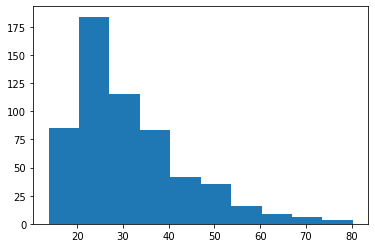

In [12]:
import matplotlib.pyplot as plt

plt.hist(df.Age)

### Debt

(array([286., 112.,  49.,  51.,  45.,  18.,   5.,   6.,   3.,   3.]),
 array([ 0.    ,  2.6335,  5.267 ,  7.9005, 10.534 , 13.1675, 15.801 ,
        18.4345, 21.068 , 23.7015, 26.335 ]),
 <BarContainer object of 10 artists>)

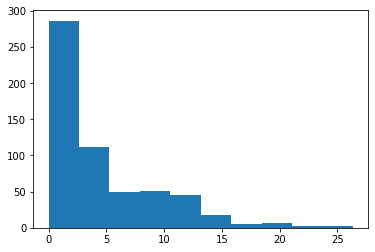

In [13]:
plt.hist(df.Debt)

### Years employed

(array([396.,  87.,  45.,  14.,   9.,   9.,   8.,   5.,   2.,   3.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

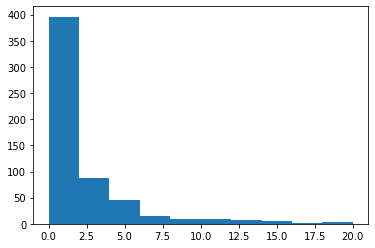

In [14]:
plt.hist(df.YearsEmployed)

### Income

(array([521.,  27.,  15.,   4.,   3.,   2.,   1.,   1.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([     0.,   2000.,   4000.,   6000.,   8000.,  10000.,  12000.,
         14000.,  16000.,  18000.,  20000.,  22000.,  24000.,  26000.,
         28000.,  30000.,  32000.,  34000.,  36000.,  38000.,  40000.,
         42000.,  44000.,  46000.,  48000.,  50000.,  52000.,  54000.,
         56000.,  58000.,  60000.,  62000.,  64000.,  66000.,  68000.,
         70000.,  72000.,  74000.,  76000.,  78000.,  80000.,  82000.,
         84000.,  86000.,  88000.,  90000.,  92000.,  94000.,  96000.,
         98000., 100000.]),
 <BarContainer object of 50 artists>)

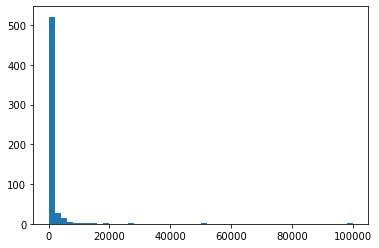

In [15]:
plt.hist(df.Income, bins=50)

## Transformations

We will now select only the numerical features. These are:

- `Age`
- `Debt`
- `YearsEmployed`
- `Income`

In [16]:
inputs = df[['Age', 'Debt', 'YearsEmployed', 'Income']]

In [17]:
inputs.describe()

,Age,Debt,YearsEmployed,Income
count,578.000000,578.000000,578.000000,578.000000
mean,31.258270,4.628460,2.069100,921.179931
std,12.014247,4.870476,3.199962,5072.488441
min,13.750000,0.000000,0.000000,0.000000
25%,22.500000,1.000000,0.165000,0.000000
50%,28.125000,2.710000,1.000000,4.000000
75%,37.500000,7.000000,2.500000,363.000000
max,80.250000,26.335000,20.000000,100000.000000


In [19]:
inputs.head(10)

,Age,Debt,YearsEmployed,Income
0,40.83,3.500,0.500,0
1,32.25,1.500,0.250,122
2,28.17,0.585,0.040,1004
3,29.75,0.665,0.250,0
4,26.50,2.710,0.085,0
5,45.33,1.000,0.125,0
6,42.25,1.750,0.000,1
7,33.17,2.250,3.500,141
8,38.58,5.000,13.500,0
9,19.17,0.585,0.585,0


In [20]:
outputs = df[['Approved']]

In [21]:
outputs.sample(10)

,Approved
471,+
330,-
212,-
545,+
523,+
408,+
151,-
159,-
29,-
378,+


In [22]:
outputs = outputs.replace({'-':0, '+':1}).astype('int8')

In [23]:
outputs.sample(10)

,Approved
210,0
307,0
39,0
545,1
416,1
424,1
115,0
580,1
308,0
417,1
